In [23]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [24]:
df =pd.read_csv("gpa1.csv")
df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [27]:
X = df.drop('admit',axis=1)
y = df['admit']

sc = StandardScaler()
scaled = sc.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
LRM = LogisticRegression()
LRM.fit(X_train,y_train)
predictions = LRM.predict(X_test)

print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

clf = LogisticRegressionCV(cv=15, random_state=0,multi_class='ovr').fit(X, y)
prediction = clf.predict(X_test)
print(accuracy_score(y_test,prediction))

/home/sanusi/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sanusi/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sanusi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        81
           1       0.60      0.23      0.33        39

   micro avg       0.70      0.70      0.70       120
   macro avg       0.66      0.58      0.57       120
weighted avg       0.68      0.70      0.65       120

0.7166666666666667


0.7166666666666667
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        81
           1       0.67      0.26      0.37        39

   micro avg       0.72      0.72      0.72       120
   macro avg       0.70      0.60      0.59       120
weighted avg       0.71      0.72      0.67       120



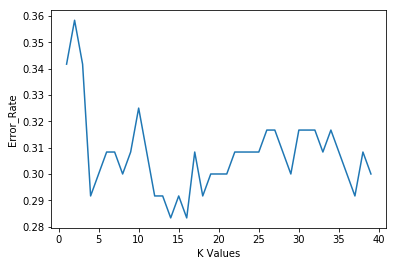

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train,y_train)

predictions = KNN.predict(X_test)

print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

#Using the elbow method to choose the best value of K

error_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,40),error_rate)
plt.xlabel('K Values')
plt.ylabel('Error_Rate')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

rfc_predictions = rfc.predict(X_test)

print(accuracy_score(y_test,predictions))
print(classification_report(y_test,rfc_predictions))

0.7166666666666667
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        81
           1       0.50      0.46      0.48        39

   micro avg       0.68      0.68      0.68       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.67      0.68      0.67       120

